# Importando Librerías Requeridas

In [363]:
#imports
import numpy as np
import pprint as sstd
import pandas as pd
from pandas import Series, DataFrame
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sea
sea.set(style = 'ticks', color_codes = True)

#estimators
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#model metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder

#Calibration Curve
from sklearn.calibration import calibration_curve

In [475]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 7.0]


# Importando Datos Iniciales

In [548]:
#data inicial
rawDataInicial = pd.read_csv('/Users/nrodriguez/Documents/PythonProjects/Marchamos/marchamosvInicial.csv', header=0)
rawDataInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 14 columns):
UBICACION_CAJA          31525 non-null object
TIPO_PLACA              31525 non-null object
ESTILO_VEHICULO         31525 non-null object
MARCA_VEHICULO          31525 non-null object
ANTIGUEDAD_VEHICULO     31525 non-null int64
ANOMODELO_VEHICULO      31525 non-null int64
CAPACIDAD               31525 non-null int64
VALOR_FISCAL            31525 non-null int64
CILINDRADA              31525 non-null int64
COMBUSTIBLE             31525 non-null object
MONTO_MARCHAMO          31525 non-null int64
PROVINCIA_PAGADOR       31525 non-null object
CANTON_PAGADOR          31525 non-null object
SEGURO_MASPROTECCION    31525 non-null object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


# Verifica si hay datos nulos

In [404]:
rawDataInicial.isnull().sum()

UBICACION_CAJA          0
TIPO_PLACA              0
ESTILO_VEHICULO         0
MARCA_VEHICULO          0
ANTIGUEDAD_VEHICULO     0
ANOMODELO_VEHICULO      0
CAPACIDAD               0
VALOR_FISCAL            0
CILINDRADA              0
COMBUSTIBLE             0
MONTO_MARCHAMO          0
PROVINCIA_PAGADOR       0
CANTON_PAGADOR          0
SEGURO_MASPROTECCION    0
dtype: int64

## No se identificaron datos nulos

# Transforma Variable Dependiente en Categórica

In [549]:
rawDataInicial['SEGURO_MASPROTECCION'] = rawDataInicial['SEGURO_MASPROTECCION'].map({'NO':0, 'SI':1})
rawDataInicial['SEGURO_MASPROTECCION'] = rawDataInicial['SEGURO_MASPROTECCION'].astype('int64')
rawDataInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 14 columns):
UBICACION_CAJA          31525 non-null object
TIPO_PLACA              31525 non-null object
ESTILO_VEHICULO         31525 non-null object
MARCA_VEHICULO          31525 non-null object
ANTIGUEDAD_VEHICULO     31525 non-null int64
ANOMODELO_VEHICULO      31525 non-null int64
CAPACIDAD               31525 non-null int64
VALOR_FISCAL            31525 non-null int64
CILINDRADA              31525 non-null int64
COMBUSTIBLE             31525 non-null object
MONTO_MARCHAMO          31525 non-null int64
PROVINCIA_PAGADOR       31525 non-null object
CANTON_PAGADOR          31525 non-null object
SEGURO_MASPROTECCION    31525 non-null int64
dtypes: int64(7), object(7)
memory usage: 3.4+ MB


# Selección de Variables

# Matriz de Correlación

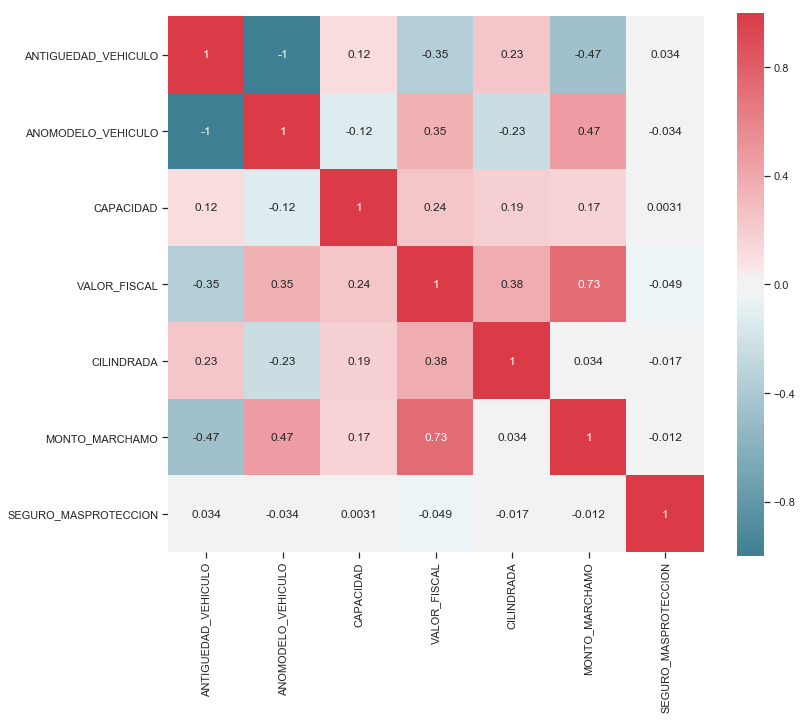

In [486]:
corrMatriz = rawDataInicial.corr()
#print(corrMatriz)
f, ax = plt.subplots(figsize=(12, 10))
sea.heatmap(corrMatriz, mask=np.zeros_like(corrMatriz, dtype=np.bool), cmap=sea.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

### Nota: La matriz de correlación  nos indica que podria eliminarse las variables ANOMODELO_VEHICULO y VALOR_FISCAL, por su correlacion con las variables ANTIGUEDAD_VEHICULO y MONTO_MARCHAMO

# Matriz de Covarianza

In [544]:
#Relación directa entre las dos variables, resultado de la covarianza da positivo
#Relación inversa entre las dos variables, resultado de la covarianza da negativo, una aumenta y otra disminuye
#Cuando entre las dos variables no hay una relación, la covarianza da un valor cercano a cero

covMatriz = rawDataInicial.cov()
print(covMatriz)

                      ANTIGUEDAD_VEHICULO  ANOMODELO_VEHICULO     CAPACIDAD  \
ANTIGUEDAD_VEHICULO          1.167077e+02       -1.167077e+02  4.156266e+00   
ANOMODELO_VEHICULO          -1.167077e+02        1.167077e+02 -4.156266e+00   
CAPACIDAD                    4.156266e+00       -4.156266e+00  9.663142e+00   
VALOR_FISCAL                -1.502391e+07        1.502391e+07  2.944092e+06   
CILINDRADA                   4.519196e+03       -4.519196e+03  1.073323e+03   
MONTO_MARCHAMO              -4.882519e+05        4.882519e+05  5.147116e+04   
SEGURO_MASPROTECCION         1.325258e-01       -1.325258e-01  3.480345e-03   

                      VALOR_FISCAL    CILINDRADA  MONTO_MARCHAMO  \
ANTIGUEDAD_VEHICULO  -1.502391e+07  4.519196e+03   -4.882519e+05   
ANOMODELO_VEHICULO    1.502391e+07 -4.519196e+03    4.882519e+05   
CAPACIDAD             2.944092e+06  1.073323e+03    5.147116e+04   
VALOR_FISCAL          1.555946e+13  2.638671e+09    2.788880e+11   
CILINDRADA            2.638

# Eliminando Datos Innecesarios

In [445]:
rawDataInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 10 columns):
UBICACION_CAJA          31525 non-null object
TIPO_PLACA              31525 non-null object
MARCA_VEHICULO          31525 non-null object
ANTIGUEDAD_VEHICULO     31525 non-null category
CAPACIDAD               31525 non-null int64
COMBUSTIBLE             31525 non-null object
MONTO_MARCHAMO          31525 non-null category
PROVINCIA_PAGADOR       31525 non-null object
CANTON_PAGADOR          31525 non-null object
SEGURO_MASPROTECCION    31525 non-null int64
dtypes: category(2), int64(2), object(6)
memory usage: 2.0+ MB


In [550]:
#La columna ESTILO_VEHICULO contiene mucha variabilidad en sus datos, se elimina
#La columna CILINDRADA puede ser eliminada, existe correlacion con atributo CAPACIDAD
#La columna ANOMODELO_VEHICULO puede ser eliminada, existe correlación con atributo ANTIGUEDAD_VEHICULO
#La columna VALOR_FISCAL puede ser eliminada, existe correlación con atributo MONTO_MARCHAMO

del rawDataInicial['ESTILO_VEHICULO']
del rawDataInicial['CILINDRADA']
del rawDataInicial['ANOMODELO_VEHICULO']
del rawDataInicial['VALOR_FISCAL']

# Análisis Exploratorio

## Discretización de Variables

### La antiguedad del vehiculo se discretiza en 6 grupos

In [553]:
rawDataInicial['ANTIGUEDAD_VEHICULO'] = pd.cut(rawDataInicial['ANTIGUEDAD_VEHICULO'], 
                                               bins=[0, 3, 5, 10, 15, 20, 25, 30, 40, 80, 120], 
                                               right = True, 
                                               precision = 0)

### El monto del marchamo del vehículo se discretiza en 6 grupos

In [551]:
rawDataInicial['MONTO_MARCHAMO'] = pd.cut(rawDataInicial['MONTO_MARCHAMO'], 
                                          bins=[0, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 250000, 300000, 350000, 400000, 500000, 800000, 3000000],  
                                          right = True, 
                                          precision = 0)

# Gráficos

Text(0.5, 0, 'Cantidad de Observaciones')

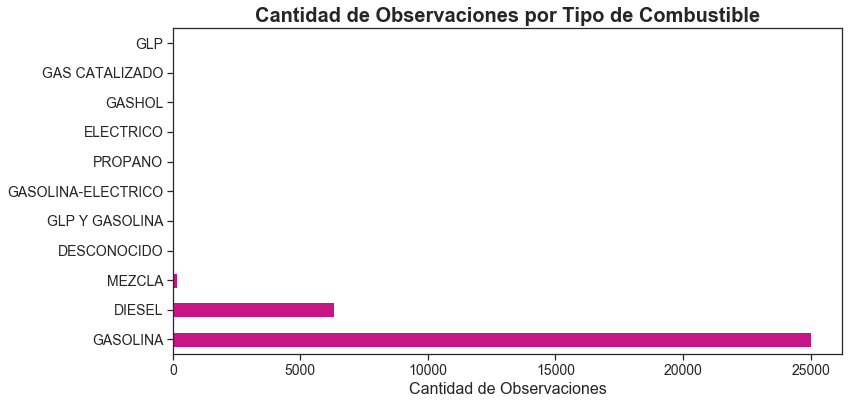

In [505]:
#rawDataInicial.COMBUSTIBLE.value_counts().plot(kind='barh',
#                                               title="Cantidad de Observaciones por Tipo de Combustible",
#                                              fontsize=14)

grafico1 = rawDataInicial.COMBUSTIBLE.value_counts().plot.barh(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=14
)
grafico1.set_title("Cantidad de Observaciones por Tipo de Combustible", fontsize=20, fontweight="bold")
grafico1.set_xlabel('Cantidad de Observaciones', fontsize=16)

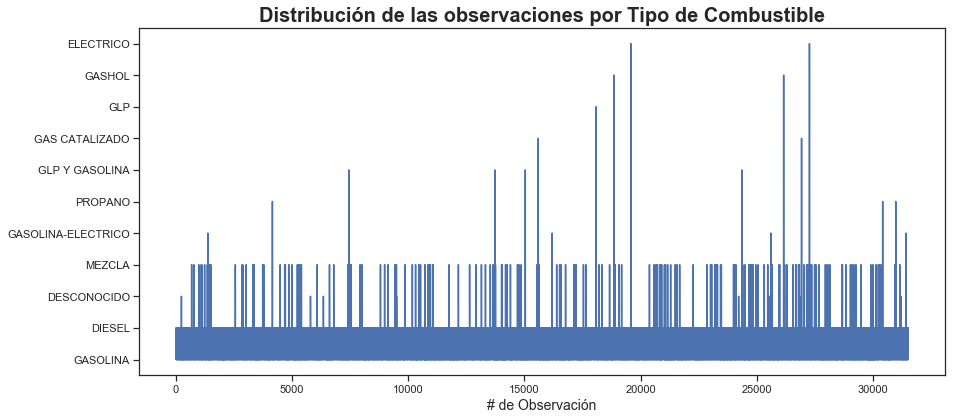

In [506]:
plt.title('Distribución de las observaciones por Tipo de Combustible',fontsize=20, fontweight="bold")
#plt.suptitle('Gráfico #1',fontsize=16, fontweight="bold")
plt.xlabel('# de Observación', fontsize=14)
plt.tight_layout()
plt.plot(rawDataInicial['COMBUSTIBLE'])
plt.show()

### El gráfico anterior muestra que el tipo de combustible DIESEL y GASOLINA predominan en las observaciones, que el combustible MEZCLA y DESCONOCIDO tienen también una representación importante en las observaciones y finalmente que los demás tipos de combustible se presentan muy esporádicamente en las observaciones.

Text(0.5, 0, 'Cantidad de Observaciones')

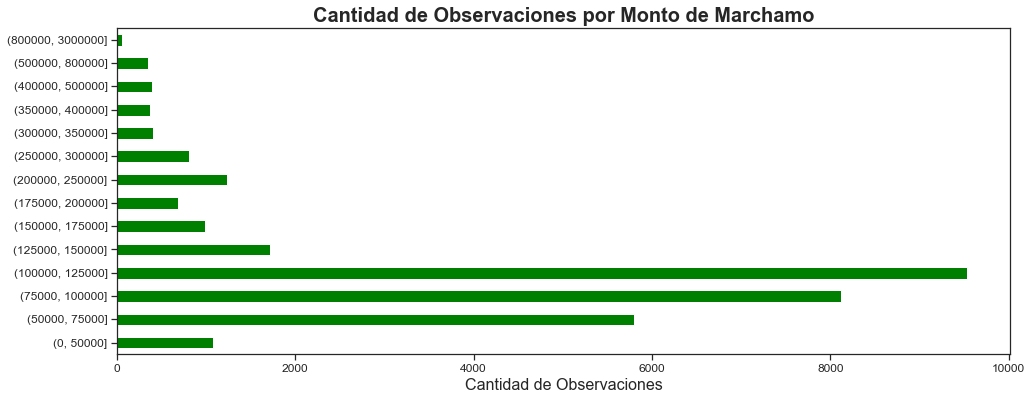

In [552]:
grafico2 = rawDataInicial.MONTO_MARCHAMO.value_counts().sort_index().plot.barh(
    figsize=(16, 6),
    color='green',
    fontsize=12
)
grafico2.set_title("Cantidad de Observaciones por Monto de Marchamo", fontsize=20, fontweight="bold")
grafico2.set_xlabel('Cantidad de Observaciones', fontsize=16)

Text(0.5, 0, 'Cantidad de Observaciones')

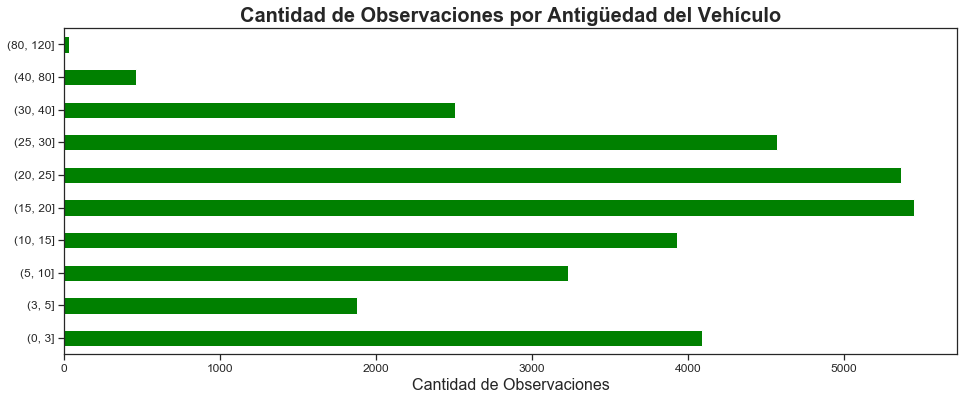

In [554]:
grafico3 = rawDataInicial.ANTIGUEDAD_VEHICULO.value_counts().sort_index().plot.barh(
    figsize=(16, 6),
    color='green',
    fontsize=12
)
grafico3.set_title("Cantidad de Observaciones por Antigüedad del Vehículo", fontsize=20, fontweight="bold")
grafico3.set_xlabel('Cantidad de Observaciones', fontsize=16)

# Importando Datos Finales

In [329]:
#data final
rawData = pd.read_csv('/Users/nrodriguez/Documents/PythonProjects/Marchamos/marchamosvUltima.csv', header=0)
rawData.head()

,UBICACION_CAJA,TIPO_PLACA,MARCA_VEHICULO,ANTIGUEDAD_VEHICULO,ANOMODELO_VEHICULO,VALOR_FISCAL,CILINDRADA,COMBUSTIBLE,MONTO_MARCHAMO,PROVINCIA_PAGADOR,CANTON_PAGADOR,SEGURO_MASPROTECCION
0,SAN ISIDRO GENERAL 1,MOT,YAMAHA,13,2006,1050000,450,GASOLINA,109003,San José,Perez Zeledon,NO
1,PARRITA,PART,HYUNDAI,12,2007,4920000,2000,DIESEL,211604,Puntarenas,Parrita,NO
2,APILAC,PART,DAIHATSU,29,1990,470000,1189,GASOLINA,68359,San José,Perez Zeledon,NO
3,PALMARES,CL,TOYOTA,30,1989,600000,2400,GASOLINA,64333,San José,Perez Zeledon,NO
4,SAN ISIDRO GENERAL 1,CL,MITSUBISHI,21,1998,2180000,2500,DIESEL,92085,San José,Perez Zeledon,NO


# Estructura de los Datos

In [330]:
rawData.info()
#rawData.MARCA_VEHICULO.unique()

#Count distict values,
#rawDataInicial['CAPACIDAD'].nunique()
#Count only non-null values
#rawData['TIPO_PLACA'].count()
#Count total values including null values
#rawData['TIPO_PLACA'].size

#rawData['MONTO_MARCHAMO'].max()
rawData.min(axis = 0) 
#rawData['CAPACIDAD'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 12 columns):
UBICACION_CAJA          31525 non-null object
TIPO_PLACA              31525 non-null object
MARCA_VEHICULO          31525 non-null object
ANTIGUEDAD_VEHICULO     31525 non-null int64
ANOMODELO_VEHICULO      31525 non-null int64
VALOR_FISCAL            31525 non-null int64
CILINDRADA              31525 non-null int64
COMBUSTIBLE             31525 non-null object
MONTO_MARCHAMO          31525 non-null int64
PROVINCIA_PAGADOR       31525 non-null object
CANTON_PAGADOR          31525 non-null object
SEGURO_MASPROTECCION    31525 non-null object
dtypes: int64(5), object(7)
memory usage: 2.9+ MB


UBICACION_CAJA             ALAJUELA
TIPO_PLACA                       AB
MARCA_VEHICULO               A.M.C.
ANTIGUEDAD_VEHICULO               0
ANOMODELO_VEHICULO             1900
VALOR_FISCAL                  90000
CILINDRADA                        0
COMBUSTIBLE             DESCONOCIDO
MONTO_MARCHAMO                10256
PROVINCIA_PAGADOR          Alajuela
CANTON_PAGADOR            Abangares
SEGURO_MASPROTECCION             NO
dtype: object

# Eiminando Columnas Innecesarias

In [331]:
#La columna ESTILO_VEHICULO contiene mucha variabilidad en sus datos, se elimina
#La columna CILINDRADA puede ser eliminada, existe correlacion con atributo CAPACIDAD
#La columna ANOMODELO_VEHICULO puede ser eliminada, existe correlación con atributo ANTIGUEDAD_VEHICULO
#La columna VALOR_FISCAL puede ser eliminada, existe correlación con atributo MONTO_MARCHAMO

del rawData['ESTILO_VEHICULO']
del rawData['CILINDRADA']
del rawData['ANOMODELO_VEHICULO']
del rawData['VALOR_FISCAL']

# Preparación de los Datos

In [332]:
#Ordinal Encoding

#encoder = OrdinalEncoder()
#rawData.ANOMODELO_VEHICULO = encoder.fit_transform(rawData.ANOMODELO_VEHICULO.values.reshape(-1,1))

#for payCont in (rawData.filter(regex='PAY_\d+')) :
#    #print('Ordinal', payCont)
#    rawData[payCont] = encoder.fit_transform(rawData[payCont].values.reshape(-1,1))
    
    
#OneHot Encoding

oneHot = OneHotEncoder(dtype=np.int, sparse=True)
nominals_COMBUSTIBLE = pd.DataFrame(oneHot.fit_transform(rawData[['COMBUSTIBLE']])\
                        .toarray(),
                        columns=['GASOLINA', 'DIESEL', 'DESCONOCIDO', 'MEZCLA',\
                                'GASOLINA-ELECTRICO', 'PROPANO', 'GLP Y GASOLINA',\
                                'GAS CATALIZADO', 'GLP', 'GASHOL', 'ELECTRICO'])
rawData = rawData.drop(['COMBUSTIBLE'],axis=1)
rawData = pd.concat([rawData,nominals_COMBUSTIBLE],axis=1)


nominals_UBICACION_CAJA = pd.DataFrame(oneHot.fit_transform(rawData[['UBICACION_CAJA']])\
                        .toarray(),
                        columns=['SAN ISIDRO GENERAL 1', 'PARRITA', 'APILAC', 'PALMARES',
       'SAN PEDRO POAS', 'SAN ISIDRO GENERAL 3', 'GUAYCARA (RIO CLARO)',
       'SAN ISIDRO GENERAL 2', 'CAÑAS', 'VILLA LIGIA', 'UPALA',
       'CIUDAD COLON', 'BUENOS AIRES', 'ALAJUELA', 'BAHIA BALLENA',
       'PEJIBAYE', 'NARANJO', 'CIUDAD NEILLY', 'SAN IGNACIO', 'PARQUE',
       'TACARES', 'SIQUIRRES', 'LA VIRGEN (SARAPIQUI)', 'QUEPOS',
       'SAN VITO', 'LAUREL', 'LIMON', 'SAN ISIDRO GENERAL',
       'PUNTARENAS (EL ROBLE)', 'CORONADO', 'UNIDAD DE VENTAS ',
       'PALMAR NORTE', 'GOLFITO', 'LIBERIA', 'HEREDIA', 'DESAMPARADOS',
       'NICOYA', 'LA CRUZ', 'PUERTO JIMENEZ', 'SAN JOSE', 'GUAPILES',
       'MERCADOR MUNICIPAL 2', 'SAN MARCOS (LOS SANTOS)', 'SABALITO',
       'SANTA CRUZ', 'CIUDAD CORTES', 'ROSARIO (LA FILA)',
       'MERCADOR MUNICIPAL 1', 'CARTAGO', 'EDIFICIO IRMA', 'HOJANCHA',
       'CIUDAD QUESADA'])

rawData = rawData.drop(['UBICACION_CAJA'],axis=1)
rawData = pd.concat([rawData,nominals_UBICACION_CAJA],axis=1)


nominals_TIPO_PLACA = pd.DataFrame(oneHot.fit_transform(rawData[['TIPO_PLACA']])\
                        .toarray(),
                        columns=['MOT', 'PART', 'CL', 'C', 'PB', 'EE', 'AB', 'TL', 'GB', 'TP',
       'SJB', 'TSJ', 'TC', 'BM', 'TA', 'D', 'VE', 'HB', 'TG', 'LB', 'TH',
       'CB', 'PEN', 'EXP'])

rawData = rawData.drop(['TIPO_PLACA'],axis=1)
rawData = pd.concat([rawData,nominals_TIPO_PLACA],axis=1)

nominals_MARCA_VEHICULO = pd.DataFrame(oneHot.fit_transform(rawData[['MARCA_VEHICULO']])\
                        .toarray(),
                        columns=['YAMAHA', 'HYUNDAI', 'DAIHATSU', 'TOYOTA', 'MITSUBISHI', 'NISSAN',
       'CHEVROLET', 'DATSUN', 'ISUZU', 'KENWORTH', 'SERPENTO', 'JEEP',
       'GENESIS', 'KIA', 'HONDA', 'GEO', 'GENERAL MOTOR COMPANY', 'VOLVO',
       'HUSABERG', 'MASSEY FERGUSON', 'INTERNATIONAL', 'SUBARU',
       'MERCEDES BENZ', 'VOLKSWAGEN', 'SUZUKI', 'MAZDA', 'FORD', 'ROKK',
       'MACK', 'LANDINI', 'FREIGHTLINER', 'FREEDOM', 'SSANG YONG',
       'CATERPILLAR', 'GREATWALL', 'JMC', 'CHRYSLER', 'BRANSON', 'OPEL',
       'BUICK', 'KATANA', 'B.M.W.', 'RENAULT', 'FORMULA', 'MAHINDRA',
       'DODGE', 'LAMBORGHINI', 'KEEWAY', 'HERO', 'GEELY', 'PLYMOUTH',
       'DAEWOO', 'SAME', 'KAWASAKI', 'YUTONG', 'LAND ROVER', 'FOTON',
       'AUDI', 'AKT', 'SUKIDA', 'OSAKA', 'BAJAJ', 'BYD', 'WUYANG',
       'SHINERAY', 'JAC', 'HAOJUE', 'UNITED MOTORS', 'NEW HOLLAND', 'ZAP',
       'ROVER', 'ALL TERRAIN', 'PEUGEOT', 'SANYANG', 'SENKE', 'FIAT',
       'K.T.M.', 'BENELLI', 'SCANIA', 'EAGLE', 'CITROEN', 'PIAGGIO',
       'VALTRA', 'ORION', 'CHANGAN', 'JCB', 'FAW', 'JIALING',
       'JOHN DEERE', 'GONOW', 'CAN-AM', 'KIAMOTORS', 'PONTIAC', 'AHM',
       'G.M.C.', 'MERCURY', 'BLUEBIRD (*)', 'RANGE ROVER', 'PETERBILT',
       'CFMOTO', 'J.C.B.', 'EUROMOT', 'SONIK MOTOR', 'HARLEY DAVIDSON',
       'YUMBO', 'YINGANG', 'TVS', 'KOMATSU', 'HAFEI', 'CASE-IH', 'KYMCO',
       'VALMET', 'SOUTH EAST', 'MOTO CRUISER', 'HAIMA', 'THOMAS', 'LEXUS',
       'VENTO', 'HINO', 'BMW', 'SINSKI', 'UNICO', 'LML', 'WILLYS',
       'JINAN QINGQI', 'KUBOTA', 'ASIA', 'NO ESPECIFICADO', 'SP@ZZIO',
       'BLAW-KNOX', 'LIGHT', 'APRILIA', 'IVECO', 'CASE IH', 'INDIAN',
       'WHITE', 'COLT', 'CMC', 'PORSCHE', 'RANGER-ROVER', 'ACURA',
       'DONGFENG', 'CASE', 'MINI', 'FORLAND', 'GAS GAS', 'C.B.T.',
       'GREENTEC', 'LONCIN', 'FERGUSON', 'SCION', 'POLARIS', 'STEYR',
       'DADI AUTO', 'HIGER', 'MAX', 'M.Z.', 'HUSQVARNA', 'ZONGSHEN',
       'NEW HOLLAND FORD', 'CHEROCKE', 'CHANGFENG', 'ZIL', 'ZNA',
       'LINCOLN', 'JIANSHE', 'L.M.L', 'XING-FU', 'BELARUZ', 'FEIYING',
       'NOFFIELD', 'DAF', 'FORDSON', 'SATURN', 'RENLI', 'MASA', 'JAGUAR',
       'YINXIANG/TIGER', 'MACK TRUCK', 'CHANA/TIGER', 'MRT', 'L M L',
       'PROTON', 'LADA', 'SABA', 'UNIVERSAL', 'CHANLIN', 'INFINITI',
       'SKODA', 'V.M', 'BLK', 'MOTOTEK', 'KORANDO', 'CIXI', 'BRAU',
       'ARCTIC CAT', 'ZOTYE', 'GEO CHEVROLET', 'BOMBARDIR', 'PETERBILL',
       'FOREDIL', 'XCMG', 'SAMSUNG', 'POLARSUN', 'STARK', 'HUMMER',
       'REGAL RAPTOR', 'VESPA', 'LIFAN', 'YADEA', 'HANOMAG', 'DELFINO',
       'MAX MOTOR', 'OMOTO', 'SSANGYONG MUSSO', 'DFM', 'HEIBAO', 'KIOTI',
       'TEREX', 'MARCA NO REGISTRADA', 'A.M.C.', 'TAKEUCHI',
       'MADIRUS DEUTZ', 'HSUN'])

rawData = rawData.drop(['MARCA_VEHICULO'],axis=1)
rawData = pd.concat([rawData,nominals_MARCA_VEHICULO],axis=1)

nominals_PROVINCIA_PAGADOR = pd.DataFrame(oneHot.fit_transform(rawData[['PROVINCIA_PAGADOR']])\
                        .toarray(),
                        columns=['San José', 'Puntarenas', 'Alajuela', 'Guanacaste', 'Limón',
       'Heredia', 'Cartago'])

rawData = rawData.drop(['PROVINCIA_PAGADOR'],axis=1)
rawData = pd.concat([rawData,nominals_PROVINCIA_PAGADOR],axis=1)


nominals_CANTON_PAGADOR = pd.DataFrame(oneHot.fit_transform(rawData[['CANTON_PAGADOR']])\
                        .toarray(),
                        columns=['Perez Zeledon', 'Parrita', 'Poas', 'Golfito', 'Buenos Aires',
       'Cañas', 'Upala', 'Mora', 'Alajuela', 'Pococí', 'San José',
       'Naranjo', 'Acosta', 'Grecia', 'Siquirres', 'Sarapiquí', 'Aguirre',
       'Coto Brus', 'Corredores', 'Limón', 'Puntarenas', 'Osa',
       'Alfaro Ruiz', 'Desamparados', 'Nicoya', 'San Carlos', 'La Cruz',
       'Alajuelita', 'Bagaces', 'San Isidro', 'Valverde Vega',
       'Santa Ana', 'Leon Cortez', 'Santa Cruz', 'Liberia', 'Goicoechea',
       'Escazú', 'Aserrí', 'Montes de Oro', 'Paraiso', 'Dota', 'La Unión',
       'Vasquez de Coronado', 'Moravia', 'Cartago', 'Heredia', 'Carrillo',
       'Tarrazú', 'Puriscal', 'Matina', 'Turrialba', 'Atenas', 'Hojancha',
       'Nandayure', 'San Ramón', 'Guácimo', 'Montes de Oca', 'Esparza',
       'Guarco', 'Barva', 'Curridabat', 'Guatuso', 'Abangares',
       'Santo Domingo', 'Santa Bárbara', 'San Rafael', 'Oreamuno',
       'Palmares', 'Tilarán', 'Belen', 'San Pablo', 'Flores', 'Orotina',
       'Talamanca', 'Garabito', 'Tibás', 'Jimenez', 'Los Chiles',
       'Alvarado', 'Turrubares'])

rawData = rawData.drop(['CANTON_PAGADOR'],axis=1)
rawData = pd.concat([rawData,nominals_CANTON_PAGADOR],axis=1)


#Transforma Variable Dependiente en Categorica
rawData['SEGURO_MASPROTECCION'] = rawData['SEGURO_MASPROTECCION'].map({'NO':0, 'SI':1})
rawData['SEGURO_MASPROTECCION'] = rawData['SEGURO_MASPROTECCION'].astype('category')

rawData.head()

,ANTIGUEDAD_VEHICULO,VALOR_FISCAL,MONTO_MARCHAMO,SEGURO_MASPROTECCION,GASOLINA,DIESEL,DESCONOCIDO,MEZCLA,GASOLINA-ELECTRICO,PROPANO,...,San Pablo,Flores,Orotina,Talamanca,Garabito,Tibás,Jimenez,Los Chiles,Alvarado,Turrubares
0,13,1050000,109003,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,12,4920000,211604,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,470000,68359,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,30,600000,64333,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,21,2180000,92085,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Selección de Variables

# RFE (Recursive Feature Elimination)

### The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance.The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [334]:
X = rawData.drop("SEGURO_MASPROTECCION",1)   #Feature Matrix
y = rawData["SEGURO_MASPROTECCION"]          #Target Variable


model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

# Find the optimum number of features

### Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [345]:
#no of features
nof_list=np.arange(1,402)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 378
Score with 378 features: 0.054733


# Get the final set of features

### As seen from above code, the optimum number of features is 10. We now feed 10 as number of features to RFE and get the final set of features given by RFE method, as follows.

In [348]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 378)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['GASOLINA', 'DIESEL', 'DESCONOCIDO', 'MEZCLA', 'GASOLINA-ELECTRICO',
       'PROPANO', 'GLP Y GASOLINA', 'GAS CATALIZADO', 'GLP', 'GASHOL',
       ...
       'Tilarán', 'San Pablo', 'Flores', 'Orotina', 'Talamanca', 'Tibás',
       'Jimenez', 'Los Chiles', 'Alvarado', 'Turrubares'],
      dtype='object', length=378)


In [365]:
#print(selected_features_rfe, sep=',', end='\n', file=sys.stdout, flush=False)

for p in selected_features_rfe:
    print(p)

#sourceFile = open('python.txt', 'w')
#print(selected_features_rfe, file = sourceFile)
#sourceFile.close()

GASOLINA
DIESEL
DESCONOCIDO
MEZCLA
GASOLINA-ELECTRICO
PROPANO
GLP Y GASOLINA
GAS CATALIZADO
GLP
GASHOL
ELECTRICO
SAN ISIDRO GENERAL 1
PARRITA
APILAC
PALMARES
SAN PEDRO POAS
SAN ISIDRO GENERAL 3
GUAYCARA (RIO CLARO)
SAN ISIDRO GENERAL 2
CAÑAS
VILLA LIGIA
UPALA
CIUDAD COLON
BUENOS AIRES
ALAJUELA
BAHIA BALLENA
PEJIBAYE
NARANJO
CIUDAD NEILLY
SAN IGNACIO
PARQUE
TACARES
SIQUIRRES
LA VIRGEN (SARAPIQUI)
QUEPOS
SAN VITO
LAUREL
LIMON
SAN ISIDRO GENERAL
PUNTARENAS (EL ROBLE)
CORONADO
UNIDAD DE VENTAS 
PALMAR NORTE
GOLFITO
LIBERIA
HEREDIA
DESAMPARADOS
NICOYA
LA CRUZ
PUERTO JIMENEZ
SAN JOSE
GUAPILES
MERCADOR MUNICIPAL 2
SAN MARCOS (LOS SANTOS)
SABALITO
SANTA CRUZ
CIUDAD CORTES
ROSARIO (LA FILA)
MERCADOR MUNICIPAL 1
CARTAGO
EDIFICIO IRMA
HOJANCHA
CIUDAD QUESADA
MOT
PART
CL
C
PB
EE
AB
TL
GB
TP
SJB
TSJ
TC
BM
TA
D
VE
HB
TG
LB
TH
CB
PEN
EXP
YAMAHA
HYUNDAI
DAIHATSU
TOYOTA
MITSUBISHI
NISSAN
CHEVROLET
DATSUN
ISUZU
KENWORTH
SERPENTO
JEEP
GENESIS
KIA
HONDA
GEO
GENERAL MOTOR COMPANY
VOLVO
HUSABERG
MASSEY FERG

In [190]:
#features
features = rawData.iloc[:,0:403]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ANOMODELO_VEHICULO,VALOR_FISCAL,CILINDRADA,MONTO_MARCHAMO,SEGUROMASPROTECCION,GASOLINA,DIESEL,DESCONOCIDO,MEZCLA,GASOLINA-ELECTRICO,...,San Pablo,Flores,Orotina,Talamanca,Garabito,Tibás,Jimenez,Los Chiles,Alvarado,Turrubares
0,2006,1050000,450,109003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,4920000,2000,211604,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1990,470000,1189,68359,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,600000,2400,64333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,2180000,2500,92085,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Selección de Variable Dependiente

In [191]:
#dependent variable
depVar = rawData['SEGUROMASPROTECCION']

# Training Set Features

In [192]:
#Training Set (Feature Space: X Training)
#70 % para entrenamiento
X_train = (features[: 22068])
X_train.head()

,ANOMODELO_VEHICULO,VALOR_FISCAL,CILINDRADA,MONTO_MARCHAMO,SEGUROMASPROTECCION,GASOLINA,DIESEL,DESCONOCIDO,MEZCLA,GASOLINA-ELECTRICO,...,San Pablo,Flores,Orotina,Talamanca,Garabito,Tibás,Jimenez,Los Chiles,Alvarado,Turrubares
0,2006,1050000,450,109003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,4920000,2000,211604,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1990,470000,1189,68359,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,600000,2400,64333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,2180000,2500,92085,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training Set Variable Dependiente

In [193]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 22068]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22068


0    0
1    0
2    0
3    0
4    0
Name: SEGUROMASPROTECCION, dtype: category
Categories (2, int64): [0, 1]

# Testing Set Features

In [194]:
#Testing Set (X Testing)
X_test = features[-9457:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9457
       ANOMODELO_VEHICULO  VALOR_FISCAL   CILINDRADA  MONTO_MARCHAMO   \
22068                2014        1820000         250           109003   
22069                2000        8520000        5900           264679   
22070                1992         980000        1600            74479   
22071                2017       16520000        2500           568189   
22072                2012       10750000        2982           361379   

      SEGUROMASPROTECCION  GASOLINA  DIESEL  DESCONOCIDO  MEZCLA  \
22068                   0         0       0            0       0   
22069                   0         0       1            0       0   
22070                   0         0       0            0       0   
22071                   0         0       0            0       0   
22072                   0         0       1            0       0   

       GASOLINA-ELECTRICO  ...  San Pablo  Flores  Orotina  Talamanca  \
22068           

# Ground Truth

In [195]:
#Ground Truth (y_test) 
y_test = depVar[-9457:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9457


22068    0
22069    0
22070    0
22071    0
22072    0
Name: SEGUROMASPROTECCION, dtype: category
Categories (2, int64): [0, 1]

# Cross Validation

In [196]:
#Implement Cross Validation anytime we need to by simply running the following on the X and Y training sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train)

#The shape function to double check that the split was made as needed
X_train.shape, X_test.shape

((16551, 403), (5517, 403))

# Tuning Parameters and Models Definition

In [197]:
#Models
#max_iter > 25000 igual resultado que con 100000, < 25000 baja el Score
#gamma='scale' mal resultado
#SVM con max_iter 1000 bajo desempeño
# Classification Models
modelSVM = svm.SVC(gamma='scale', max_iter=10000, decision_function_shape='ovo', random_state=None)
modelKNN = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=10, p=2,weights='uniform')
modelGNB = GaussianNB()

#modelDTC = DecisionTreeClassifier(max_depth=5)
#modelRFC = RandomForestClassifier(n_estimators=100)
#modelGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#modelSVM = svm.SVC(gamma='scale', max_iter=1000, decision_function_shape='ovo', random_state=None)
#modelKNN = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',metric_params=None, n_jobs=5, n_neighbors=10, p=2,weights='uniform')
#modelKNN = KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',metric_params=None, n_jobs=5, n_neighbors=10, p=2,weights='distance')

# Regression Models
#modelSVR = SVR(gamma='auto',max_iter=25000)
#modelRF = RandomForestRegressor(n_jobs=5,max_depth=5, random_state=0,n_estimators=100)
#modelLR = LinearRegression(n_jobs=5, normalize=False, fit_intercept=False)

#features
print('Summary of feature sample')
features.head()

#dependent variable
#print(depVar)

Summary of feature sample


,ANOMODELO_VEHICULO,VALOR_FISCAL,CILINDRADA,MONTO_MARCHAMO,SEGUROMASPROTECCION,GASOLINA,DIESEL,DESCONOCIDO,MEZCLA,GASOLINA-ELECTRICO,...,San Pablo,Flores,Orotina,Talamanca,Garabito,Tibás,Jimenez,Los Chiles,Alvarado,Turrubares
0,2006,1050000,450,109003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,4920000,2000,211604,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1990,470000,1189,68359,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,600000,2400,64333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,2180000,2500,92085,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KNN Model Result

In [198]:
modelKNN.fit(X_train,y_train)
prediccionKNN = modelKNN.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test, prediccionKNN))
metrics.confusion_matrix(y_test,prediccionKNN)
print(prediccionKNN)

Accuracy Score:  0.8660503897045496
[0 0 0 ... 0 0 0]


# Support Vector Machine Model Result

In [199]:
modelSVM.fit(X_train,y_train)
prediccionSVM = modelSVM.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test, prediccionSVM))
metrics.confusion_matrix(y_test,prediccionSVM)
print(prediccionSVM)

Accuracy Score:  0.8435744063802791
[0 0 0 ... 0 0 0]


# Gaussian Naive Bayes Model Result

In [200]:
modelGNB.fit(X_train,y_train)
prediccionGNB = modelGNB.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test, prediccionGNB))
#metrics.confusion_matrix(y_test,prediccionGB)
print(prediccionGNB)

Accuracy Score:  0.8435744063802791
[0 0 0 ... 0 0 0]
